# DBSCAN

In [59]:
import pandas as pd
import numpy as np

In [60]:
class Point:
    def __init__(self, coordinates, type, neighboringPoints, cluster):
        self.coordinates = coordinates
        self.type = type    # For 1 for core point, 2 for border point and 3 for outlier
        self.neighboringPoints = neighboringPoints
        self.cluster = cluster


In [61]:
def EuclDist(x, p, eps, MinPts):
    NeighboringPoints = []
    type = 0
    for j in range(len(x)):
        point = x[j]
        dist = 0
        for i in range(len(point)):
            dist = dist + (point[i] - p[i]) ** 2
        dist = dist ** (1 / 2)
        if dist < eps:
            NeighboringPoints.append(j)     # The point is not added rather the index is added.
    if len(NeighboringPoints) > MinPts:
        type = 1 # Core Point
    elif len(NeighboringPoints) > 1:
        type = 2 # Non Core Point
    else:
        type = 3 # Outlier

    return [NeighboringPoints, type]

In [62]:
def DBscan(x, eps, MinPts):
    currentCluster = 0
    points = []

    for data in x:
        [NeighboringPoints, type] = EuclDist(x, data, eps, MinPts)
        points.append(Point(data, type, NeighboringPoints, 1 - type))       # This is done to ensure a core point that has not been clustered yet.
    for i in range(len(x)):
        if points[i].cluster == 0:  # Core point not yet clustered
            currentCluster = currentCluster + 1
            points[i].cluster = currentCluster
            findClusterPoints(x, currentCluster, points, i, eps, MinPts)
        
    return points

In [63]:
def findClusterPoints(x, currentCluster, points, position, eps, MinPts):
    ClusterMembers = points[position].neighboringPoints
    i = 0
    while i < len(ClusterMembers):
        expansionPoint = ClusterMembers[i]
        if points[expansionPoint].cluster == -1:
            points[expansionPoint].cluster = currentCluster
        elif points[expansionPoint].cluster == 0:
            points[expansionPoint].cluster = currentCluster
            ClusterMembers = ClusterMembers + points[expansionPoint].neighboringPoints
        i = i + 1

In [64]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

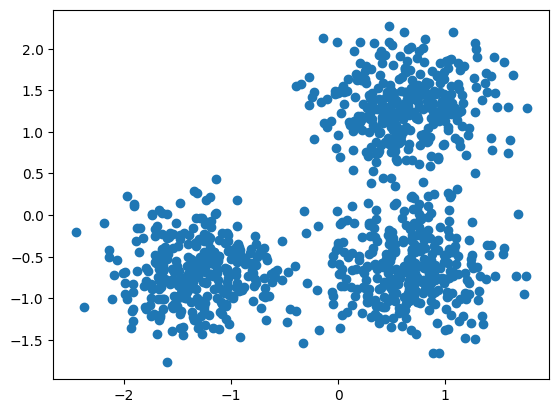

In [65]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=1000, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1])

In [66]:
points = DBscan(X, eps=0.2, MinPts=5)
clusters = []
for point in points:
    clusters.append(point.cluster)

In [67]:
df = pd.DataFrame(X, columns = ["x", "y"])
df['clusters'] = np.array(clusters)
df = df.sort_values("clusters")
df['clusters'] = df['clusters'].apply(lambda x: 'Outliers' if x == -2 else x)
df['clusters'] = df['clusters'].apply(lambda x: "Border points that don't belong to clusters" if x == -1 else x)
df

,x,y,clusters
959,-0.939852,0.186722,Outliers
627,1.070245,2.199491,Outliers
734,-1.137168,0.433237,Outliers
632,-2.179587,-0.100394,Outliers
789,-1.593931,-1.771422,Outliers
...,...,...,...
61,-1.470791,0.143213,3
49,-1.253475,-0.307248,3
50,-1.036570,-0.680084,3
54,-1.020905,-0.705682,3


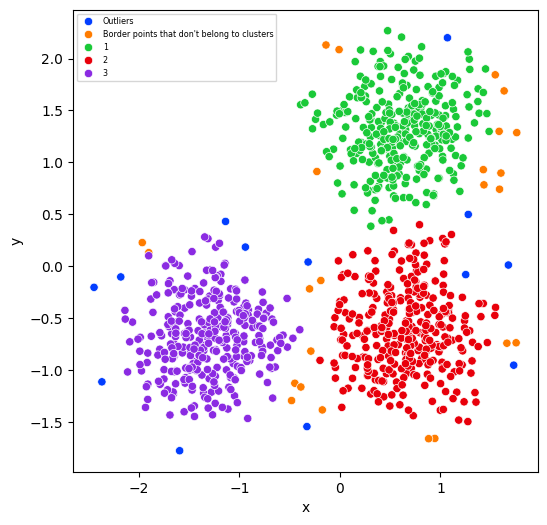

In [68]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data = df, x = "x", y = "y", hue = "clusters", palette = "bright")
plt.legend(fontsize='xx-small')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
import time
ourTimes = []
sklearnTimes = []
centers = [[1, 1], [-1, -1], [1, -1]]
for i in range(10):
    X, labels_true = make_blobs(
        n_samples=200 * (i + 1), centers=centers, cluster_std=0.4, random_state=0
    )
    X = StandardScaler().fit_transform(X)
    start = time.time()
    db = DBSCAN(eps=0.3, min_samples=5).fit(X)
    end = time.time()
    sklearnTimes.append(end - start)
    start = time.time()
    points = DBscan(X, 0.3, 5)
    end = time.time()
    ourTimes.append(end-start)

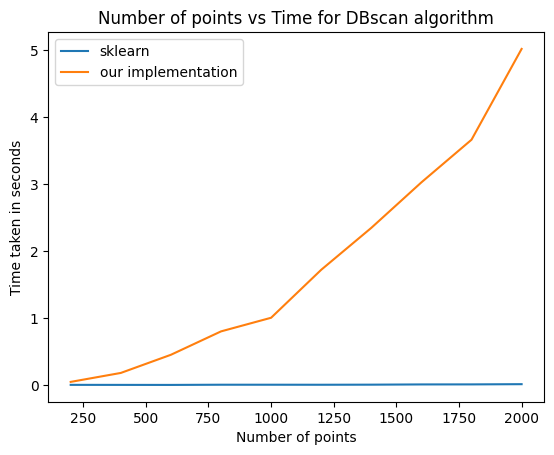

In [ ]:
#We note a quadratic relationship between number of points and time taken
xaxis = [200 * (i+1) for i in range(10)]
plt.plot(xaxis, sklearnTimes)
plt.plot(xaxis, ourTimes)
plt.title('Number of points vs Time for DBscan algorithm')
plt.xlabel('Number of points')
plt.ylabel('Time taken in seconds')
plt.legend(['sklearn', 'our implementation'])
plt.show()